In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importando a base de dados pra variável dados
dados = pd.read_csv('Startups+in+2021+end.csv')
dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [4]:
# checando o tamanho da base de dados
dados.shape

(936, 8)

In [11]:
# checando as colunas
dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [16]:
# renomeando as colunas
dados = dados.rename(columns = {'Unnamed: 0':'ID','Company':'Empresa','Valuation ($B)':'Valor ($B)','Date Joined':'Data de Adesão',
                        'Country':'País','City':'Cidade','Industry':'Setor','Select Investors':'Investidores'})

dados.head()

,ID,Empresa,Valor ($B),Data de Adesão,País,Cidade,Setor,Investidores
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [55]:
# verificando os tipos de informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($B)      936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          936 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    936 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [56]:
# mudando o tipo da coluna Data
dados['Data de Adesão'] = pd.to_datetime(dados['Data de Adesão'])

In [60]:
# verificando se alterou a coluna
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              936 non-null    int64         
 1   Empresa         936 non-null    object        
 2   Valor ($B)      936 non-null    object        
 3   Data de Adesão  936 non-null    datetime64[ns]
 4   País            936 non-null    object        
 5   Cidade          936 non-null    object        
 6   Setor           936 non-null    object        
 7   Investidores    936 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 58.6+ KB


In [17]:
# verificando a quantidade de dados nulos
dados.isnull().sum()

ID                 0
Empresa            0
Valor ($B)         0
Data de Adesão     0
País               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

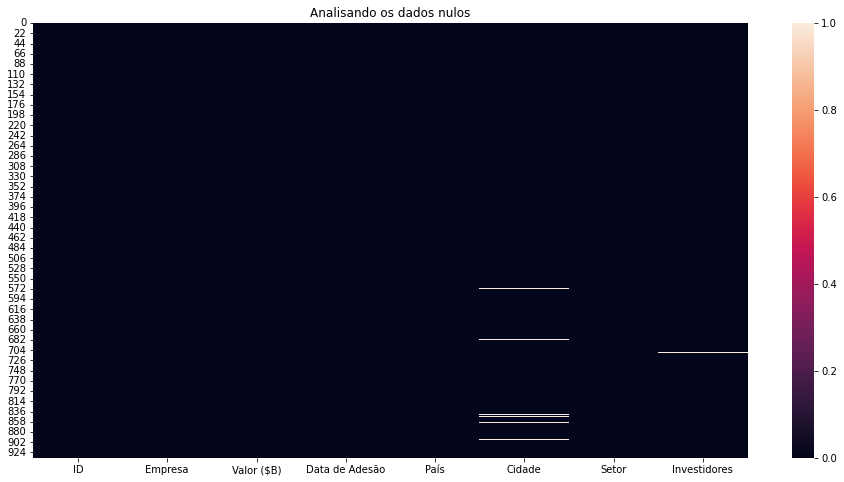

In [23]:
# mostrando os dados nulos por gráfico
plt.figure(figsize = (16,8))
plt.title('Analisando os dados nulos')
sns.heatmap(dados.isnull())

In [25]:
# atribuindo o valor '-' aos campos nulos de texto, esse valor não afetará a análise dos dados
dados = dados.fillna('-')
dados.isnull().sum()

ID                0
Empresa           0
Valor ($B)        0
Data de Adesão    0
País              0
Cidade            0
Setor             0
Investidores      0
dtype: int64

In [28]:
# verificando os campos unicos
dados.nunique()

ID                936
Empresa           935
Valor ($B)        192
Data de Adesão    589
País               47
Cidade            240
Setor              17
Investidores      921
dtype: int64

In [29]:
# verificando os valores unicos da coluna 'Setor'
dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [30]:
# verificando quantos registros aparecem de cada valor unico
dados['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [31]:
# verificando quantos registros aparecem de cada valor unico em porcentagem
dados['Setor'].value_counts(normalize = True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

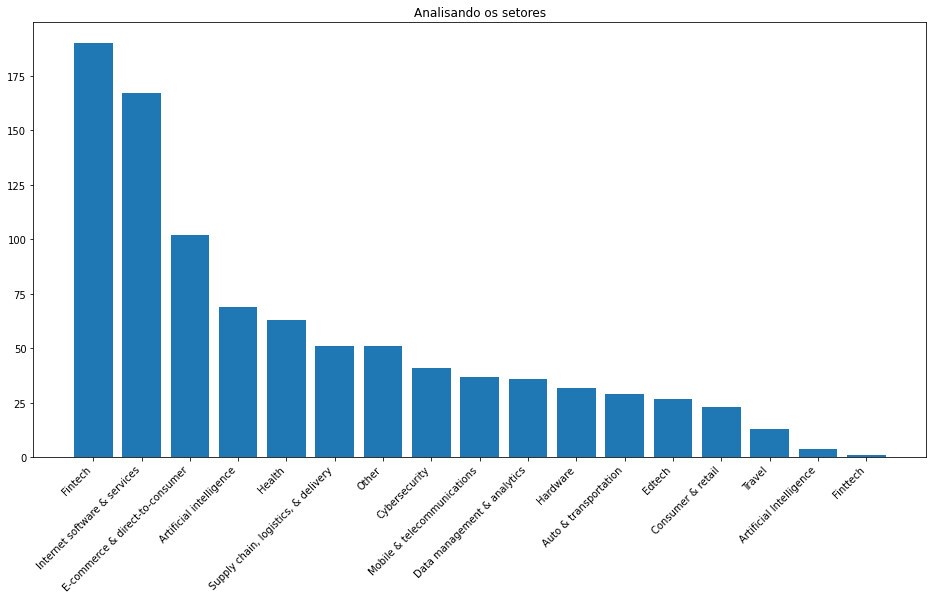

In [36]:
# analisando graficamente os setores
plt.figure(figsize = (16,8))
plt.title('Analisando os setores')
plt.bar(dados['Setor'].value_counts().index, dados['Setor'].value_counts())
plt.xticks(rotation = 45, ha='right');

In [43]:
# verificando os registros de cada país
pais = dados['País'].value_counts()
pais

United States           477
China                   169
India                    51
United Kingdom           37
Germany                  23
Israel                   21
France                   19
Canada                   15
Brazil                   15
South Korea              11
Singapore                11
Hong Kong                 7
Japan                     6
Australia                 6
Mexico                    5
Netherlands               5
Indonesia                 4
Spain                     4
Sweden                    4
Switzerland               4
Ireland                   3
United Arab Emirates      3
Norway                    3
Belgium                   2
Thailand                  2
Denmark                   2
Philippines               2
Finland                   2
Colombia                  2
South Africa              2
Turkey                    2
Austria                   2
Chile                     1
Malaysia                  1
Czech Republic            1
United States,      

In [42]:
# verificando os registros de cada país em porcentagem
pais_perc = round(dados['País'].value_counts(normalize = True) * 100, 1)
pais_perc

United States           51.0
China                   18.1
India                    5.4
United Kingdom           4.0
Germany                  2.5
Israel                   2.2
France                   2.0
Canada                   1.6
Brazil                   1.6
South Korea              1.2
Singapore                1.2
Hong Kong                0.7
Japan                    0.6
Australia                0.6
Mexico                   0.5
Netherlands              0.5
Indonesia                0.4
Spain                    0.4
Sweden                   0.4
Switzerland              0.4
Ireland                  0.3
United Arab Emirates     0.3
Norway                   0.3
Belgium                  0.2
Thailand                 0.2
Denmark                  0.2
Philippines              0.2
Finland                  0.2
Colombia                 0.2
South Africa             0.2
Turkey                   0.2
Austria                  0.2
Chile                    0.1
Malaysia                 0.1
Czech Republic

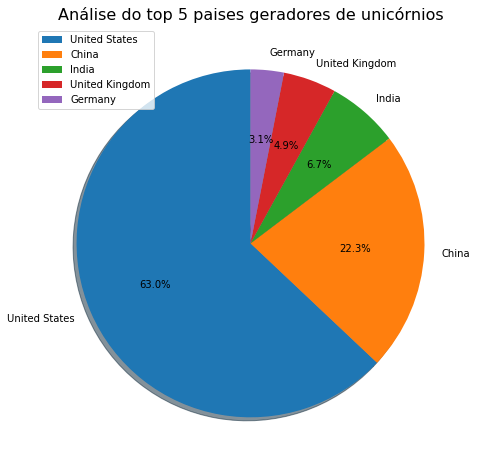

In [52]:
# criando um gráfico de pizza dos paises
plt.figure(figsize = (16,8))
plt.title('Análise do top 5 paises geradores de unicórnios', fontsize = 16)
plt.pie(pais_perc.head(5), labels = pais_perc.index[0:5], shadow = True, startangle = 90, autopct = '%1.1f%%')
plt.legend();

In [61]:
# criando as colunas Mês e Ano
dados['Mês'] = pd.DatetimeIndex(dados['Data de Adesão']).month
dados['Ano'] = pd.DatetimeIndex(dados['Data de Adesão']).year

In [62]:
dados.head()

,ID,Empresa,Valor ($B),Data de Adesão,País,Cidade,Setor,Investidores,Mês,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [74]:
# Criando uma tabela analítica
Analise_agrupada = dados.groupby(by = ['País','Ano','Mês', 'Empresa']).count()['ID'].reset_index()
Analise_agrupada

,País,Ano,Mês,Empresa,ID
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [70]:
# pesquisando a analise agrupada por país
Analise_agrupada.loc[Analise_agrupada['País'] == 'Brazil']

,País,Ano,Mês,Empresa,ID
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [75]:
# transformando a coluna de valor em numeric
dados['Valor ($B)'] = pd.to_numeric(dados['Valor ($B)'].apply(lambda Linha: Linha.replace('$','')))

In [76]:
# verificando a mudança
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              936 non-null    int64         
 1   Empresa         936 non-null    object        
 2   Valor ($B)      936 non-null    float64       
 3   Data de Adesão  936 non-null    datetime64[ns]
 4   País            936 non-null    object        
 5   Cidade          936 non-null    object        
 6   Setor           936 non-null    object        
 7   Investidores    936 non-null    object        
 8   Mês             936 non-null    int64         
 9   Ano             936 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 73.2+ KB


In [89]:
# corrigindo um erro de digitação onde um país se chamava 'United States,'
dados['País'] = dados['País'].apply(lambda Linha: Linha.replace('United States,','United States'))

In [90]:
analise_pais = dados.groupby(by = ['País']).sum()['Valor ($B)'].reset_index()
analise_pais.sort_values('Valor ($B)', ascending = False, inplace = True)
analise_pais

,País,Valor ($B)
44,United States,1605.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


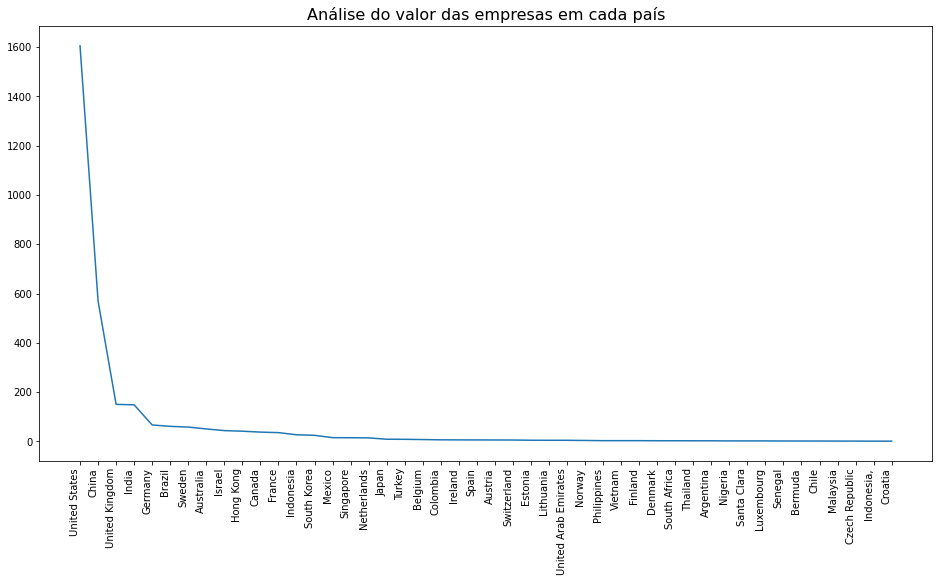

In [95]:
# verificando pelo gráfico os valores das empresas em cada país
plt.figure(figsize = (16,8))
plt.title('Análise do valor das empresas em cada país', fontsize = 16)
plt.plot(analise_pais['País'], analise_pais['Valor ($B)'])
plt.xticks(rotation = 90, ha = 'right');